<a href="https://colab.research.google.com/github/adityagarg941/SQL-integration-with-Python/blob/main/Sqlite_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/orders.csv')
print("CSV Data:")
print(df)

CSV Data:
        Customer_ID Customer_Status  Order_Date Delivery_Date   Order_ID  \
0               579          Silver  2017-01-01    2017-01-07  123002578   
1              7574          SILVER  2017-01-01    2017-01-05  123004074   
2             28861            Gold  2017-01-01    2017-01-04  123000871   
3             43796            Gold  2017-01-01    2017-01-06  123002851   
4             54673            Gold  2017-01-01    2017-01-04  123003607   
...             ...             ...         ...           ...        ...   
185008        92467          SILVER  2021-12-31    2021-12-31  124433239   
185009        92866          Silver  2021-12-31    2021-12-31  124436561   
185010        92894          Silver  2021-12-31    2021-12-31  124434316   
185011        93239            Gold  2021-12-31    2022-01-02  124436170   
185012        93317          Silver  2021-12-31    2021-12-31  124434324   

          Product_ID  Quantity  Total_Price  Cost_Price_Per_Unit  
0       2.

In [6]:
conn = sqlite3.connect('ccdb.db')

In [7]:
df.to_sql('orders', conn, if_exists='replace', index=False)

185013

In [16]:
query = '''
SELECT
    Product_ID,
    COUNT(Order_ID) AS Total_qty,
    SUM(Total_Price) AS Revenue
FROM
    orders
GROUP BY
    Product_ID
'''
orders_summary = pd.read_sql_query(query, conn)


In [22]:
print("\nOrders Summary:")
print(orders_summary)


Orders Summary:
     Product_ID  Total_qty      Revenue
0  2.100000e+11      17309  1028786.710
1  2.200000e+11      64838  8135052.015
2  2.300000e+11      26986  5688483.110
3  2.400000e+11      44820  7506482.990
4  2.410000e+11      31060  3282698.490


In [18]:
import seaborn as sns

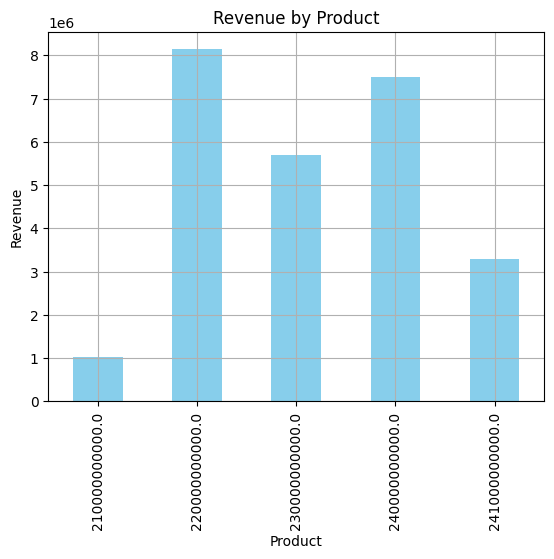

In [23]:
orders_summary.plot(kind='bar', x='Product_ID', y='Revenue', legend=False, color='skyblue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.grid(True)
plt.show()